Epoch 1/5


2024-12-23 15:40:37.457699: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


1675/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8698 - loss: 0.4449

2024-12-23 15:40:42.968244: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18816000 exceeds 10% of free system memory.


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8703 - loss: 0.4433 - val_accuracy: 0.9663 - val_loss: 0.1174
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9661 - loss: 0.1126 - val_accuracy: 0.9747 - val_loss: 0.0906
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9765 - loss: 0.0746 - val_accuracy: 0.9758 - val_loss: 0.0847
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9834 - loss: 0.0533 - val_accuracy: 0.9782 - val_loss: 0.0797
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9875 - loss: 0.0385 - val_accuracy: 0.9788 - val_loss: 0.0856
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9701 - loss: 0.0996
Test accuracy: 0.973
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


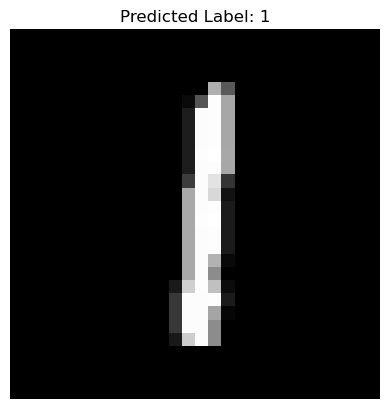

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalizar y redimensionar
X_train = X_train.reshape((-1, 28*28)).astype('float32') / 255.0
X_test = X_test.reshape((-1, 28*28)).astype('float32') / 255.0

# Construir el modelo
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilar
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluar
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

# Seleccionar una imagen aleatoria del conjunto de prueba
random_idx = np.random.randint(0, X_test.shape[0])
random_image = X_test[random_idx].reshape(28, 28)  # Redimensionamos a 28x28 para mostrarla

# Hacer una predicción
random_image_flattened = random_image.reshape(1, 28*28)  # Aplanamos para pasarla al modelo
predicted_label = np.argmax(model.predict(random_image_flattened))

# Mostrar la imagen y la predicción
plt.imshow(random_image, cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()
